In [1]:
import cv2 as cv
import random
import numpy as np
import sklearn as sk
import math
from matplotlib import pyplot as plt

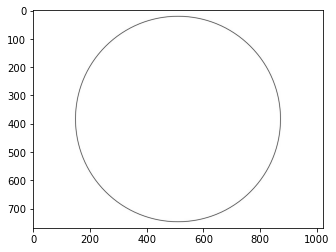

In [110]:
plt.imshow(orig)

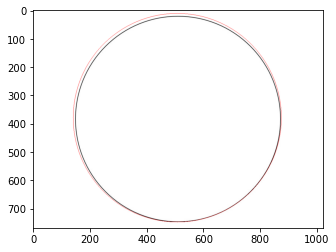

In [109]:
orig = cv.imread("circle.jpg")
copy = orig.copy()

copy = cv.circle(copy, (509,379), 368, 255, 1)

plt.imshow(copy,cmap='gray')
# plt.imshow(orig)

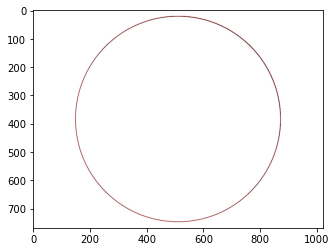

In [111]:
check = orig.copy()
check = cv.circle(check, (res[1],res[0]), res[2], 255, 1)
plt.imshow(check,cmap='gray')

In [53]:
img = cv.imread("parliament_clock.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #gray scale
img = cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT) #smoothing
img = cv.Canny(img, 100, 225)

Text(0.5, 1.0, 'Edge Image')

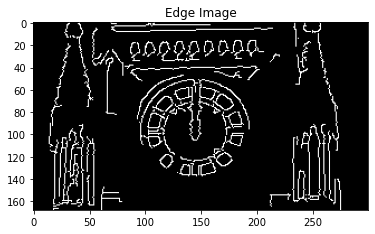

In [54]:
plt.imshow(img, cmap = 'gray')
plt.title("Edge Image")

# Perpendicular Bisector Method

In [28]:
def exists(l, val):
    for i in l:
        if i == val:
            return True
    return False

In [29]:
# Get points
a = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if(img[i][j] == 255):
            a.append([i,j])

In [30]:
# take 3 random points
points = []
temp = []
i = 0
# get 3 indices of points
while(i < 3):
    num = random.randint(0,len(a))
    if(not exists(temp, num)):
        temp.append(num)
        i += 1
# convert indices to points
for i in temp:
    points.append(a[i])

In [31]:
#t Generate Lines
p1 = points[0]
p2 = points[1]
p3 = points[2]

#line 1
m1 = (p1[0]-p2[0])/(p1[1]-p2[1])
m2 = (p1[0]-p3[0])/(p1[1]-p3[1])

b1 = p1[0]-(m1*p1[1])
b2 = p1[0]-(m2*p1[1])

#draw line 1
for x in np.linspace(min(p1[1],p2[1]), max(p1[1],p2[1]), (max(p1[1],p2[1]) - min(p1[1],p2[1]))*100):
    y = (int) (m1*x + b1)
    img[y][(int)(x)] = 255
#draw line 2
for x in np.linspace(min(p1[1],p3[1]), max(p1[1],p3[1]), (max(p1[1],p3[1]) - min(p1[1],p3[1]))*100):
    y = (int) (m2*x + b2)
    img[y][(int)(x)] = 255

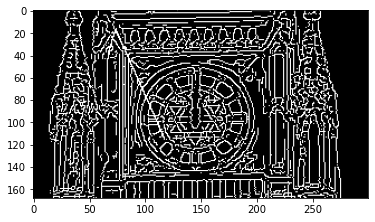

In [32]:
plt.imshow(img, cmap='gray')

In [38]:
#calculate mid points
lenx1 = max(p1[1],p2[1]) - min(p1[1],p2[1])
lenx2 = max(p1[1],p3[1]) - min(p1[1],p3[1])

mid1 = [(lenx1/2 + min(p1[1],p2[1])), (m1*(lenx1/2 + min(p1[1],p2[1])) + b1)]
mid2 = [(lenx2/2 + min(p1[1],p3[1])), (m2*(lenx2/2 + min(p1[1],p3[1])) + b2)]


#calculate perpendicular slopes
pm1 = -1/m1  #still need to account for dividing by 0 or vsmall num??
pm2 = -1/m2

#find the perpendicular bisectors
bb1 = mid1[1] - (pm1*mid1[0])
bb2 = mid2[1] - (pm2*mid2[0])

#find center of circle/intersection of bisectors
center = []
for x in np.linspace(0,img.shape[1],img.shape[1]*100):
    y1 = (int) (pm1*x + bb1)
    y2 = (int) (pm2*x + bb2)
    
    if(y1 < img.shape[0] and y1 > 0 and x < img.shape[1]):
        img[y1,(int)(x)] = 255
    if(y2 < img.shape[0] and y2 > 0 and x < img.shape[1]):
        img[y2,(int) (x)] = 255
#     print(str(y1) + " " + str(y2))
    if(y1 == y2):
#         print(str(y1) + " " + str((int)(x)))
        center = [y1,(int)(x)]
#         break

#calculate radius
a = center[0] - p1[0]
b = center[1] - p1[1]
rad = (int) (math.hypot(a,b))

In [39]:
check = cv.circle(img, (center[1],center[0]), rad, 255, 2)

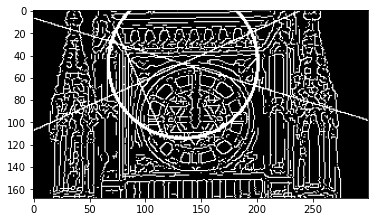

In [40]:
plt.imshow(check, cmap='gray')

# RANSAC

## genPoints() func

In [115]:
def genPoints():
    # Get points
    a = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j] == 255):
                a.append([i,j])
    # take 3 random points
    points = []
    temp = []
    i = 0
    # get 3 indices of points
    while(i < 3):
        num = random.randint(0,len(a))
        if(not exists(temp, num)):
            temp.append(num)
            i += 1
    # convert indices to points
    for i in temp:
        points.append(a[i])
    return points

## findCircle() func

In [116]:
def findCircle():
    global points
    
    #t Generate Lines
    p1 = points[0]
    p2 = points[1]
    p3 = points[2]

    #line 1
    m1 = (p1[0]-p2[0])/(p1[1]-p2[1])
    m2 = (p1[0]-p3[0])/(p1[1]-p3[1])

    b1 = p1[0]-(m1*p1[1])
    b2 = p1[0]-(m2*p1[1])

#     #draw line 1
#     for x in np.linspace(min(p1[1],p2[1]), max(p1[1],p2[1]), (max(p1[1],p2[1]) - min(p1[1],p2[1]))*100):
#         y = (int) (m1*x + b1)
#         img[y][(int)(x)] = 255
#     #draw line 2
#     for x in np.linspace(min(p1[1],p3[1]), max(p1[1],p3[1]), (max(p1[1],p3[1]) - min(p1[1],p3[1]))*100):
#         y = (int) (m2*x + b2)
#         img[y][(int)(x)] = 255
    
    #calculate mid points
    lenx1 = max(p1[1],p2[1]) - min(p1[1],p2[1])
    lenx2 = max(p1[1],p3[1]) - min(p1[1],p3[1])

    mid1 = [(lenx1/2 + min(p1[1],p2[1])), (m1*(lenx1/2 + min(p1[1],p2[1])) + b1)]
    mid2 = [(lenx2/2 + min(p1[1],p3[1])), (m2*(lenx2/2 + min(p1[1],p3[1])) + b2)]

    #calculate perpendicular slopes
    pm1 = -1/m1  #still need to account for dividing by 0 or vsmall num??
    pm2 = -1/m2

    #find the perpendicular bisectors
    bb1 = mid1[1] - (pm1*mid1[0])
    bb2 = mid2[1] - (pm2*mid2[0])

    #find center of circle/intersection of bisectors
    center = []
    for x in np.linspace(0,img.shape[1],img.shape[1]*100):
        y1 = (int) (pm1*x + bb1)
        y2 = (int) (pm2*x + bb2)
        
#         #draw bisector lines
#         if(y1 < img.shape[0] and y1 > 0 and x < 1024):
#             img[y1,(int)(x)] = 255
#         if(y2 < img.shape[0] and y2 > 0 and x < 1024):
#             img[y2,(int) (x)] = 255
        if(y1 == y2):
            center = [y1,(int)(x)]
    #calculate radius
    a = center[0] - p1[0]
    b = center[1] - p1[1]
    rad = (int) (math.hypot(a,b))
    
    return center[0],center[1],rad

## countInlier(lim) func

In [117]:
def countInlier(lim):
    global inlierPoints

    inlierPoints = []
    a=[]
    count = 0
    check = np.zeros([img.shape[0],img.shape[1]])
    check = cv.circle(check, (currCircle[1],currCircle[0]), currCircle[2], 255, 1)
    
    # Get points in img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j] == 255):
                a.append([i,j])

    #get points in check
    cPoints = []
    for i in range(check.shape[0]):
        for j in range(check.shape[1]):
            if(check[i][j] == 255):
                cPoints.append([i,j])
    
    #for each position of each point of circle, find if close to real
    for cp in cPoints:
        for p in a:
            dx = cp[1] - p[1]
            dy = cp[0] - p[0]
            dist = math.hypot(dx,dy)
            if(dist < lim):
                inlierPoints.append(cp)
                count += 1
                break    
    return count

## RANSAC() func

In [118]:
def RANSAC(iterations, lim):
    
    global currCircle
    global bCircle
    global points
    
    I = 0 #iteration number
    C = -1 #max count
    K = 0
    bCircle = (0,0,0) #best circle (best_x, best_y, best_r)
    currCircle = (0,0,0)

    while(I < iterations):
        print("Iteration: " + str(I+1))
        points = genPoints()
        currCircle = findCircle()
        K = countInlier(lim)
        if(K > C):
            bCircle = currCircle
            C = K
        print("Max Count: " + str(C))
        I += 1
    return bCircle

# Post Processing

In [123]:
def reCircle(inliers):
    
    global inlierRads
    inlierRads = []
    
    inlierPoints = []
    temp = []
    
    check = np.zeros([img.shape[0],img.shape[1]])
    check = cv.circle(check, (res[0],res[1]), res[2], 255, 1)
    
    # Get points in img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j] == 255):
                temp.append([i,j])

    #get points in check
    cPoints = []
    for i in range(check.shape[0]):
        for j in range(check.shape[1]):
            if(check[i][j] == 255):
                cPoints.append([i,j])
    
    #for each position of each point of circle, find if close to real
    for cp in cPoints:
        for p in temp:
            dx = cp[1] - p[1]
            dy = cp[0] - p[0]
            dist = math.hypot(dx,dy)
            if(dist < 1):
                inlierPoints.append(cp)
                break   
                
    sum_x = 0
    sum_y = 0
    length = len(inlierPoints)
    for i in range(len(inlierPoints)):
        sum_x += inlierPoints[i][1]
        sum_y += inlierPoints[i][0]
    
    center = [(int)(sum_x/length), (int)(sum_y/length)]
    
    rad = 0
    for p in inliers:
        #calculate radius
        a = center[0] - p[0]
        b = center[1] - p[1]
        rad += (int) (math.hypot(a,b))
    rad = (int)(rad/len(inliers))
    
    
    return center[0],center[1],rad

In [124]:
img = cv.imread("circle.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #gray scale
img = cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT) #smoothing
img = cv.Canny(img, 7, 51)

res = RANSAC(5,5)
reCircle(inlierPoints)

Iteration: 1
Max Count: 2056
Iteration: 2
Max Count: 2056
Iteration: 3
Max Count: 2056
Iteration: 4
Max Count: 2056
Iteration: 5
Max Count: 2056


(425, 421, 436)

In [93]:
reCircle(inlierPoints)

448.8
446.2


(448, 446, 368)

In [125]:
res

(379, 510, 364)

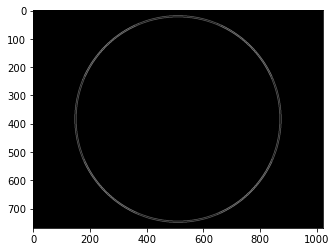

In [128]:
plt.imshow(img,cmap='gray')

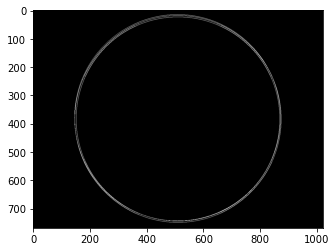

In [127]:
copy = img.copy()

copy = cv.circle(copy, (510,379), 364, 255, 1)

plt.imshow(copy,cmap='gray')

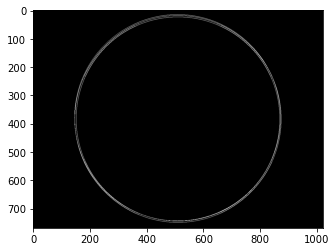

In [126]:
check = img.copy()
check = cv.circle(check, (res[1],res[0]), res[2], 255, 1)
plt.imshow(check,cmap='gray')

In [138]:
img = cv.imread("concentric_circles.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #gray scale
img = cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT) #smoothing
img = cv.Canny(img, 7, 51)

res = RANSAC(5,5)
reCircle(inlierPoints)

Iteration: 1
Max Count: 265
Iteration: 2
Max Count: 383
Iteration: 3
Max Count: 505
Iteration: 4
Max Count: 505
Iteration: 5
Max Count: 505


(166, 164, 109)

## Original Image

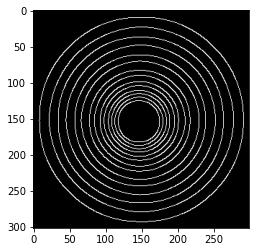

In [139]:
plt.imshow(img,cmap='gray')

## RANSAC Result

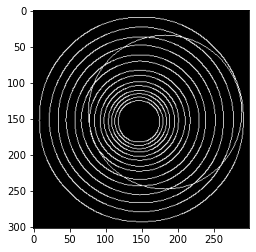

In [141]:
check = img.copy()
check = cv.circle(check, (res[1],res[0]), res[2], 255, 1)
plt.imshow(check,cmap='gray')

## Post Processing Result

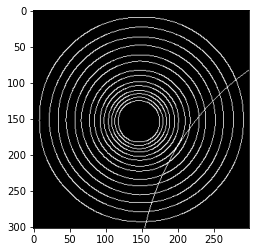

In [140]:
copy = img.copy()

copy = cv.circle(copy, (510,379), 364, 255, 1)

plt.imshow(copy,cmap='gray')

In [144]:
img = cv.imread("parliament_clock.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #gray scale
img = cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT) #smoothing
img = cv.Canny(img, 7, 51)

res = RANSAC(5,5)
reCircle(inlierPoints)

Iteration: 1
Max Count: 372
Iteration: 2
Max Count: 372
Iteration: 3
Max Count: 372
Iteration: 4
Max Count: 372
Iteration: 5
Max Count: 372


(85, 99, 61)

## Original Image

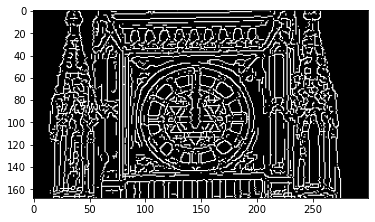

In [145]:
plt.imshow(img,cmap='gray')

## RANSAC Result

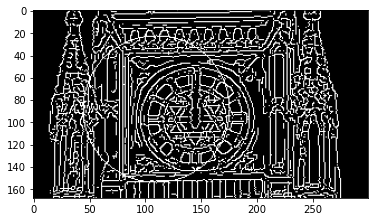

In [146]:
check = img.copy()
check = cv.circle(check, (res[1],res[0]), res[2], 255, 1)
plt.imshow(check,cmap='gray')

## Post Processing Result

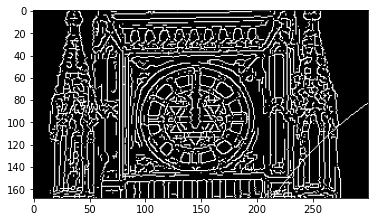

In [147]:
copy = img.copy()

copy = cv.circle(copy, (510,379), 364, 255, 1)

plt.imshow(copy,cmap='gray')